In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## DAY1 MACHINE LEARNING IN PYTHON ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [2]:
#=================================================-
#### Slide 7: Loading the packages  ####

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm



In [3]:
#=================================================-
#### Slide 8: Directory settings  ####

# Set `home_dir` to the root directory of your computer.
home_dir = Path.home()
# Set `main_dir` to the location of your `skillsoft-intro-to-machine-learning-in-python` folder.
main_dir = home_dir / "Documents" / "Learning/percipio/machine-learning-bootcamp"
# Make `data_dir` from the `main_dir` and
# remainder of the path to data directory.
data_dir = main_dir / "data"
# Create a plot directory to save our plots
plot_dir = main_dir / "plots"



In [6]:
#=================================================-
#### Slide 9: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/bnpaulus/Documents/Learning/percipio/machine-learning-bootcamp/data


In [7]:
#=================================================-
#### Slide 19: Data prep  ####

temp_heart = pd.read_csv("temp_heart_rate.csv")
print(temp_heart.head())



  Gender  Body Temp  Heart Rate
0   Male       96.3          70
1   Male       96.7          71
2   Male       96.9          74
3   Male       97.0          80
4   Male       97.1          73


In [8]:
#=================================================-
#### Slide 20: Data cleaning: NAs  ####

print(temp_heart.isnull().sum())



Gender        0
Body Temp     0
Heart Rate    0
dtype: int64


In [9]:
#=================================================-
#### Slide 21: Subset data  ####

# Subset even further to just have 'Body Temp' and 'Heart Rate'.
temp_heart_cluster = temp_heart[['Body Temp','Heart Rate']]
print(temp_heart_cluster.head())



   Body Temp  Heart Rate
0       96.3          70
1       96.7          71
2       96.9          74
3       97.0          80
4       97.1          73


In [10]:
#=================================================-
#### Slide 22: Numeric variables  ####

# Check data type of our variables.
print(temp_heart_cluster.dtypes)



Body Temp     float64
Heart Rate      int64
dtype: object


In [11]:
#=================================================-
#### Slide 25: K-means data prep using  MinMaxScaler  ####

# Instantiate MinMaxScaler.
scaler = MinMaxScaler()

# Scale the dataframe.
temp_heart_cluster_scaled = scaler.fit_transform(temp_heart_cluster)
# Convert back to dataframe, making sure to name the columns again.
temp_heart_kmeans = pd.DataFrame(temp_heart_cluster_scaled, columns = temp_heart_cluster.columns)
print(temp_heart_kmeans.head())



   Body Temp  Heart Rate
0   0.000000     0.40625
1   0.088889     0.43750
2   0.133333     0.53125
3   0.155556     0.71875
4   0.177778     0.50000


Text(0.5, 0, 'Body Temp')

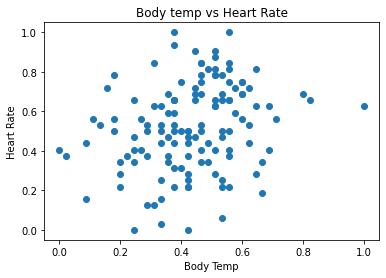

In [12]:
#=================================================-
#### Slide 31: K-means: Body Temp vs Heart Rate  ####

# Plot the data.
plt.scatter(temp_heart_kmeans['Body Temp'],
temp_heart_kmeans['Heart Rate'])

plt.title('Body temp vs Heart Rate')
plt.ylabel('Heart Rate')
plt.xlabel('Body Temp')




In [13]:
#=================================================-
#### Slide 32: K-means: k-means with k=2  ####

# K-means - start with 2 clusters.
# Initializing k-means.
kmeans_2 = KMeans(n_clusters=2)
# Fitting with inputs.
kmeans_2 = kmeans_2.fit(temp_heart_kmeans)
# Predicting the clusters.
labels = kmeans_2.predict(temp_heart_kmeans)
# Getting the cluster centers.
C_2 = kmeans_2.cluster_centers_
print(C_2)



[[0.50491803 0.71311475]
 [0.36972625 0.35643116]]


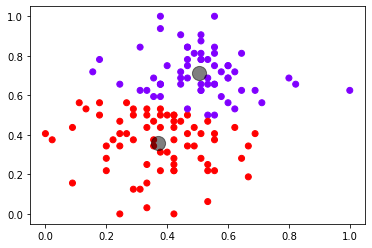

In [14]:
#=================================================-
#### Slide 33: K-means: plot k=2  ####

# First, we plot our clusters, colored in by the labels.
plt.scatter(temp_heart_kmeans.iloc[:,0],
temp_heart_kmeans.iloc[:,1],
c=kmeans_2.labels_,
cmap='rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(C_2[:, 0],
C_2[:, 1],
c='black',
s=200,
alpha=0.5)



In [ ]:
#=================================================-
#### Slide 35: Exercise 1  ####





In [12]:
#=================================================-
#### Slide 43: Elbow method  ####

# Set the range of k.
K_MAX = 20
KK = range(1,K_MAX+1)

# Run `kmeans` for values in the range k = 1-20.
KM = [kmeans(temp_heart_kmeans,k) for k in KK]

# Find the centroids for each KM output.
centroids = [cent for (cent,var) in KM]

# Calculate centroids for each iteration of k.
D_k = [cdist(temp_heart_kmeans, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]                        # Total within-cluster sum of squares
totss = sum(pdist(temp_heart_kmeans)**2)/temp_heart_kmeans.shape[0]   # The total sum of squares
betweenss = totss - tot_withinss                                # The between-cluster sum of squares



Text(0.5, 1.0, 'Elbow for KMeans clustering')

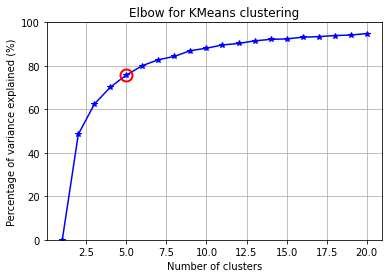

In [13]:
#=================================================-
#### Slide 45: K-means: Elbow plot method  ####

# Set range for k.
kIdx = 4        # K=5
clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100,
marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r',
markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')



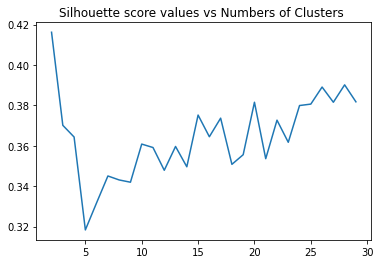

In [15]:
#=================================================-
#### Slide 46: K-means: silhouette method  ####

obs = temp_heart_kmeans
silhouette_score_values=list()

NumberOfClusters = range(2,30)

for i in NumberOfClusters:

    classifier=cluster.KMeans(i,init='k-means++', n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]



In [16]:
#=================================================-
#### Slide 47: K-means: silhouette method  ####

print("Optimal number of components is:", Optimal_NumberOf_Components)



Optimal number of components is: 2


In [17]:
#=================================================-
#### Slide 49: Baseline vs. optimal k  ####

# Explained variance for optimal number of clusters at `k = 2`.
print(betweenss[1]/totss * 100)
# Explained variance for optimal number of clusters at `k = 5`.
print(betweenss[4]/totss * 100)



48.51255790975613
75.77728483764949


In [18]:
#=================================================-
#### Slide 50: Run optimal k  ####

# Initializing K-means.
kmeans_5 = KMeans(n_clusters = 5)
# Fitting with inputs.
kmeans_5 = kmeans_5.fit(temp_heart_kmeans)
# Predicting the clusters.
labels = kmeans_5.predict(temp_heart_kmeans)
# Getting the cluster centers.
C_5 = kmeans_5.cluster_centers_



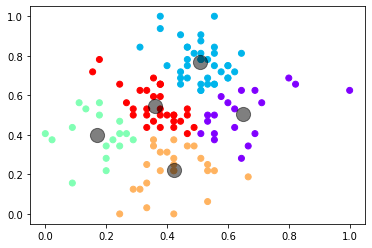

In [19]:
#=================================================-
#### Slide 51: Plot k = 5  ####

# First we plot our clusters, colored in by the labels.
plt.scatter(temp_heart_kmeans.iloc[:,0],
temp_heart_kmeans.iloc[:,1],
c = kmeans_5.labels_,
cmap = 'rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(C_5[:, 0],
C_5[:, 1],
c = 'black',
s = 200,
alpha = 0.5)



<Figure size 432x288 with 0 Axes>

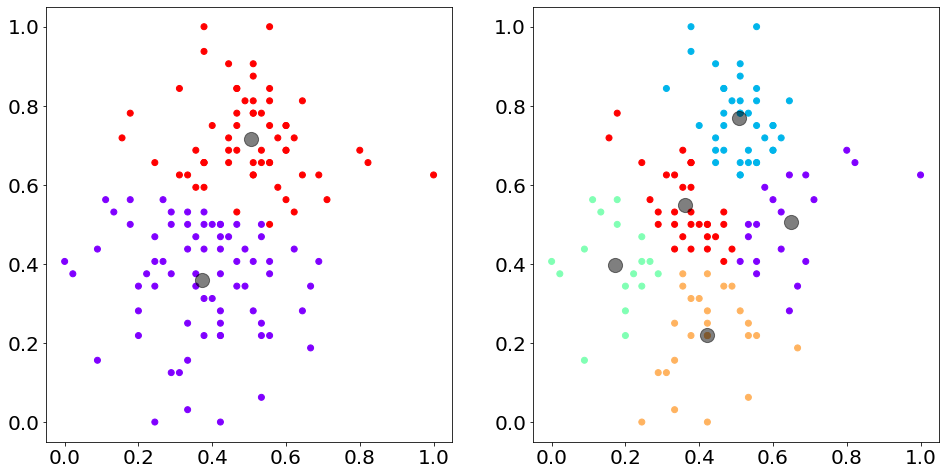

In [20]:
#=================================================-
#### Slide 52: Plot k = 2 vs. k = 5  ####

plt.clf()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plt.scatter(temp_heart_kmeans.iloc[:,0],temp_heart_kmeans.iloc[:,1],c=kmeans_2.labels_,cmap='rainbow')
plt.scatter(C_2[:, 0], C_2[:, 1], c='black', s=200,alpha=0.5)

plt.subplot(1, 2, 2)
plt.scatter(temp_heart_kmeans.iloc[:,0],temp_heart_kmeans.iloc[:,1],
c=kmeans_5.labels_, cmap='rainbow')
plt.scatter(C_5[:, 0], C_5[:, 1], c='black', s=200, alpha=0.5)




In [21]:
#=================================================-
#### Slide 54: Inspect clusters  ####

# Append the other variables back to the dataframe with clusters.
clustered_temp_heart = temp_heart_cluster
# Add cluster numbers.
clustered_temp_heart['clusters'] = pd.Series(labels)
clustered_temp_heart.head()



,Body Temp,Heart Rate,clusters
0,96.3,70,2
1,96.7,71,2
2,96.9,74,2
3,97.0,80,4
4,97.1,73,2


In [22]:
#=================================================-
#### Slide 55: Inspect clusters  ####

# Group by `clusters` column to see the group mean of each variable.
cluster_groups_means = clustered_temp_heart.groupby('clusters').mean()
print(cluster_groups_means)



          Body Temp  Heart Rate
clusters                       
0         99.221053   73.157895
1         98.589474   81.631579
2         97.070588   69.705882
3         98.196000   64.040000
4         97.925806   74.548387


In [ ]:
#=================================================-
#### Slide 59: Exercise 2  ####



